In [1]:
!pip install ultralytics
!pip install opencv-python
!pip install opencv-contrib-python

In [2]:
import cv2
print(cv2.__version__)


4.10.0


In [102]:
from ultralytics import YOLO
import cv2
import math

# Initialize the webcam
cap = cv2.VideoCapture(0)
cap.set(3, 1080)  # Set width
cap.set(4, 720)  # Set height

# Load the YOLO model
model = YOLO("yolo-Weights/yolov8n.pt")

# Object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"]

# Capture a single frame
success, img = cap.read()

if success:
    results = model(img)
    # Coordinates and annotations
    object=[]
    for r in results:
        boxes = r.boxes

        for box in boxes:
            if int(box.cls[0]) in [79,62,74,69,39,45,26,76]:
                # Bounding box
                object.append(int(box.cls[0]))
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to int values

                # Draw the box on the image
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)
                # Class name
                cls = int(box.cls[0])
                print("Class name -->", classNames[cls])

                # Object details
                org = [x1, y1]
                font = cv2.FONT_HERSHEY_SIMPLEX
                fontScale = 1
                color = (255, 0, 0)
                thickness = 2

                cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    # Display the image
    cv2.imshow('Captured Image', img)
    cv2.waitKey(0)  # Wait for a key press to close the image window

    # Optionally save the image
    cv2.imwrite('captured_image.jpg', img)

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()
print(object)


0: 384x640 1 person, 1 umbrella, 1 cell phone, 1 scissors, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
76
Class name --> scissors
[76]


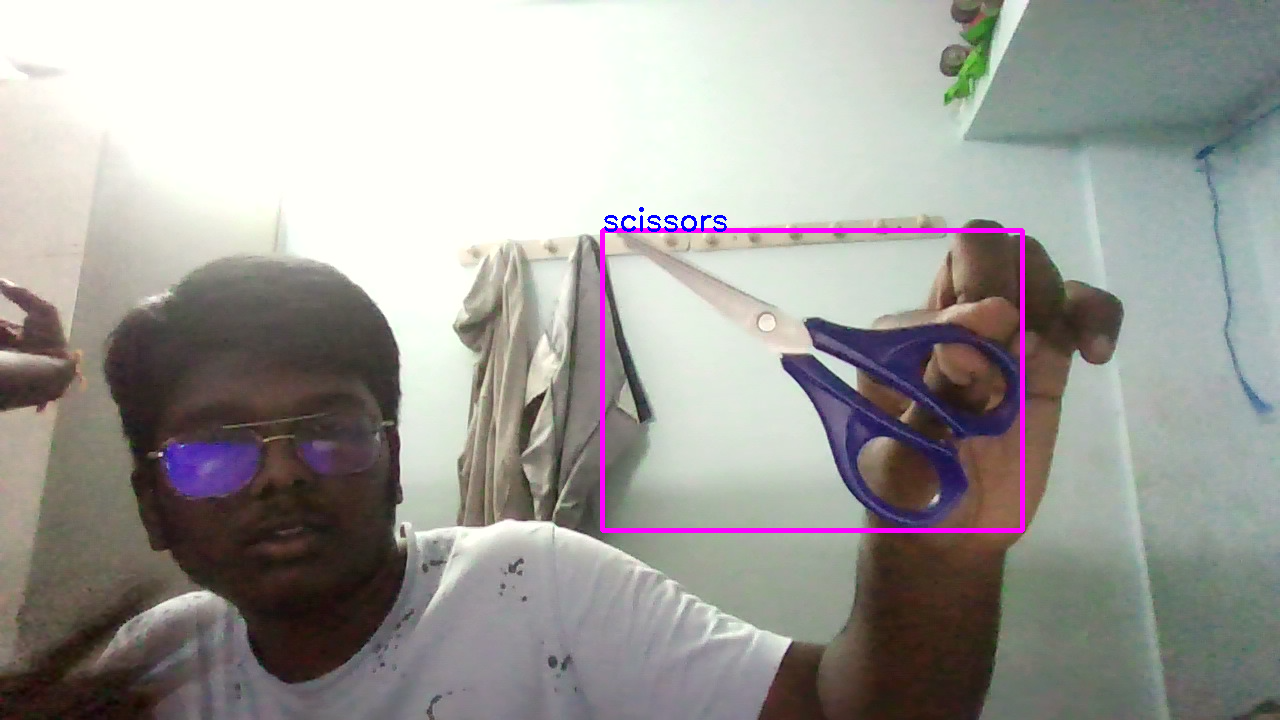

In [109]:
from IPython import display
display.Image(r'C:\Users\91709\Pictures\Captured Image.png')

In [110]:
import serial
import time

# Set up the serial connection (replace 'COM3' with your Arduino port)
ser = serial.Serial('COM5', 9600)
time.sleep(2)  # Wait for the connection to initialize

def send_command(command):
    """
    Sends a command to the Arduino.
    :param command: A string command to send to the Arduino
    """
    ser.write((command + '\n').encode())
    time.sleep(1)  # Give the Arduino time to process the command
for i in object:
    if i in [69,39,74,26]:#Recyclable Waste: Book (69), Bottle (39), Scissors (74), Tie (26)
        send_command("recycle")  # Send the "recycle" command
        time.sleep(2)
    elif i in [79,62,45,76]: #Non-Recyclable Waste: Toothbrush (79), Mouse (62), Banana (45), Teddy Bear (76)
        send_command("non-recycle")       # Send the "non-recycle" command
    else:
        send_command("reset")
# Close the serial connection
send_command("reset")
ser.close()
